In [60]:
import os

from ray import train, tune
from ray.tune.examples.mnist_pytorch import train_mnist
from ray.tune import ResultGrid

from hydra import initialize, compose

from omegaconf import OmegaConf
from datasets import load_data
from architectures import load_architecture
from utils import load_optimizer, get_args2, set_seeds, Hp_opt

import torch

# initialize(config_path="configs", version_base=None)

from utils import Setup
from distributed_experiment2 import BaseExperiment

world_size = torch.cuda.device_count()


full_path = os.path.abspath("./hpo_results")

project_name = 'test30'

for dataset in ['Aircraft', 'Flowers', 'Imagenette' ]:
    for loss in ['CLASSIC_AT', 'TRADES_v2']:
        for backbone in [ 'convnext_tiny.fb_in22k', 'convnext_tiny', 'robust_convnext_tiny', ]:
            
            config = OmegaConf.load("./configs/default_config.yaml")

            config = compose(config_name="default_config")  # Store Hydra config in a variable

            config.dataset = dataset
            config.backbone = backbone
            config.loss_function = loss
            config.project_name = 'test30'

            set_seeds(config.seed)

            setup = Setup(config, world_size)
            experiment = BaseExperiment(setup)
 
            hp_search = Hp_opt(setup)
            trainer = hp_search.get_trainer(experiment.training)

            # try:
            restored_tuner = tune.Tuner.restore('file://{}/{}_{}_{}_{}'.format(full_path, project_name, backbone, dataset, loss), trainable=trainer)
            # except:
            #     print('experiment not run yet')
            # print('loaded')

            # try:
            result_grid = restored_tuner.get_results()
            # except:
            # print('unfinihsed business')



serialized_values convnext_tiny.fb_in22k_Aircraft_CLASSIC_AT
1


RuntimeError: Can't return results as experiment has not been run, yet. Call `Tuner.fit()` to run the experiment first.

In [80]:
import os

from ray import train, tune
from ray.tune.examples.mnist_pytorch import train_mnist
from ray.tune import ResultGrid

from hydra import initialize, compose

from omegaconf import OmegaConf
from datasets import load_data
from architectures import load_architecture
from utils import load_optimizer, get_args2, set_seeds, Hp_opt

import torch

# initialize(config_path="configs", version_base=None)

from utils import Setup
from distributed_experiment2 import BaseExperiment

world_size = torch.cuda.device_count()


full_path = os.path.abspath("./hpo_results")

project_name = 'test30'

dataset = 'Aircraft'
loss = 'CLASSIC_AT'
backbone = 'convnext_tiny.fb_in22k'
            
config = OmegaConf.load("./configs/default_config.yaml")

config = compose(config_name="default_config")  # Store Hydra config in a variable

config.dataset = dataset
config.backbone = backbone
config.loss_function = loss
config.project_name = 'test30'

set_seeds(config.seed)

print(config)

setup = Setup(config, world_size)
experiment = BaseExperiment(setup)
 
hp_search = Hp_opt(setup)
trainer = hp_search.get_trainer(experiment.training)


# tune.Tuner.can_restore( '{}/{}_{}_{}_{}'.format(full_path, project_name, backbone, dataset, loss) )

# tune.Tuner.

# tuner = tune.Tuner.restore('{}/{}_{}_{}_{}'.format(full_path, project_name, backbone, dataset, loss), trainable=trainer)

tuner = tune.Tuner.restore('{}/0001_deit_small_patch16_224.fb_in1k_Flowers_CLASSIC_AT'.format(full_path, project_name, backbone, dataset, loss), trainable=trainer)

result_grid = tuner.get_results()

{'dataset': 'Aircraft', 'backbone': 'convnext_tiny.fb_in22k', 'ft_type': 'full_fine_tuning', 'loss_function': 'CLASSIC_AT', 'seed': 0, 'epochs': 10, 'lr1': None, 'lr2': None, 'weight_decay1': None, 'weight_decay2': None, 'use_rs': False, 'epsilon': 0.015686275, 'step_size': 0.007843137, 'perturb_steps': 10, 'distance': 'Linf', 'beta': 1.0, 'project_name': 'test30'}
serialized_values convnext_tiny.fb_in22k_Aircraft_CLASSIC_AT
1


In [47]:
for result in restored_tuner:
    print(result)

TypeError: 'Tuner' object is not iterable

       loss   timestamp checkpoint_dir_name   done  training_iteration  \
0  4.849817  1734541496                None  False                   1   
1  4.625800  1734541505                None  False                   2   
2  5.411369  1734541513                None  False                   3   
3  4.893069  1734541522                None  False                   4   
4  5.183959  1734541531                None  False                   5   
5  4.442366  1734541539                None  False                   6   
6  4.955027  1734541548                None  False                   7   
7  4.975580  1734541557                None  False                   8   
8  5.382074  1734541565                None  False                   9   
9  4.789857  1734541574                None  False                  10   

      trial_id                 date  time_this_iter_s  time_total_s    pid  \
0  2a096_00000  2024-12-18_12-04-56         14.021033     14.021033  42884   
1  2a096_00000  2024-12-18_12

Text(0, 0.5, 'Mean Test Accuracy')

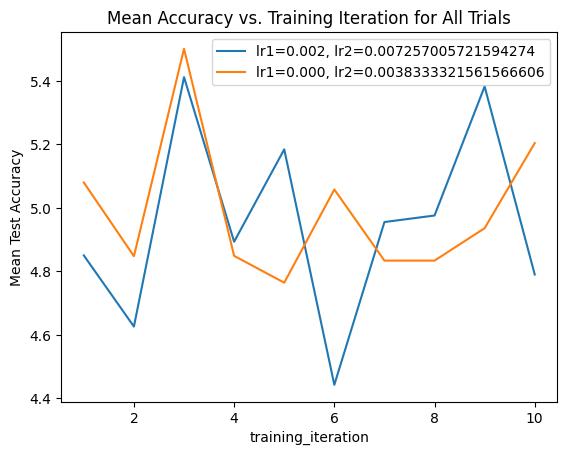

In [36]:
ax = None
for result in result_grid:
    print(result.metrics_dataframe)
    res = result.config['train_loop_config']
    # print(res)
    print()
    label = f"lr1={res['lr1']:.3f}, lr2={res['lr2']}"
    if ax is None:
        ax = result.metrics_dataframe.plot("training_iteration", "loss", label=label)
    else:
        result.metrics_dataframe.plot("training_iteration", "loss", ax=ax, label=label)
        
ax.set_title("Mean Accuracy vs. Training Iteration for All Trials")
ax.set_ylabel("Mean Test Accuracy")